In [2]:
import pandas as pd

# 데이터프레임으로 읽어오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_submission.csv')

# 'ID' 열 제거
train.drop(['ID'], axis=1, inplace=True)
test.drop(['ID'], axis=1, inplace=True)

# 결과 확인
train.head(), test.head(), ss.head()

(       대출금액        대출기간       근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
 0  12480000   36 months    6 years      RENT   72000000        18.90    15   
 1  14400000   60 months  10+ years  MORTGAGE  130800000        22.33    21   
 2  12000000   36 months    5 years  MORTGAGE   96000000         8.60    14   
 3  14400000   36 months    8 years  MORTGAGE  132000000        15.09    15   
 4  18000000   60 months    Unknown      RENT   71736000        25.39    19   
 
     대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
 0  부채 통합             0       0       0.0    0.0    0.0    C  
 1  주택 개선             0  373572  234060.0    0.0    0.0    B  
 2  부채 통합             0  928644  151944.0    0.0    0.0    A  
 3  부채 통합             0  325824  153108.0    0.0    0.0    C  
 4  주요 구매             0  228540  148956.0    0.0    0.0    B  ,
        대출금액        대출기간     근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
 0  16800000   36 months  8 years  MORTGAGE  132000000        19.64 

In [3]:
train.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [4]:
test.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0
3,14400000,36 months,5 years,MORTGAGE,66000000,13.72,30,신용 카드,1,669024,281724.0,0.0,0.0
4,27600000,36 months,5 years,RENT,55200000,30.50,12,신용 카드,0,1250052,614844.0,0.0,0.0


In [5]:
def wrangling(train_set, test_set):

    print("---Shape---")
    display(train_set.shape)
    display(test_set.shape)

    print("---Info----")
    display(train_set.info())
    display(test_set.info())

    print("---NaN----")
    display(train_set.isna().sum())
    display(test_set.isna().sum())

    print("---Duplicated---")
    display(train_set[train_set.duplicated()])
    display(test_set[test_set.duplicated()])

    print("---Description---")
    display(train_set.describe())
    display(test_set.describe())

    print("---Unique---")
    display(train_set.nunique())
    display(test_set.nunique())

wrangling(train,test)

---Shape---


(96294, 14)

(64197, 13)

---Info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          96294 non-null  int64  
 1   대출기간          96294 non-null  object 
 2   근로기간          96294 non-null  object 
 3   주택소유상태        96294 non-null  object 
 4   연간소득          96294 non-null  int64  
 5   부채_대비_소득_비율   96294 non-null  float64
 6   총계좌수          96294 non-null  int64  
 7   대출목적          96294 non-null  object 
 8   최근_2년간_연체_횟수  96294 non-null  int64  
 9   총상환원금         96294 non-null  int64  
 10  총상환이자         96294 non-null  float64
 11  총연체금액         96294 non-null  float64
 12  연체계좌수         96294 non-null  float64
 13  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(5)
memory usage: 10.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64197 entries, 0 to 64196
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   대출금액          64197 non-null  int64  
 1   대출기간          64197 non-null  object 
 2   근로기간          64197 non-null  object 
 3   주택소유상태        64197 non-null  object 
 4   연간소득          64197 non-null  int64  
 5   부채_대비_소득_비율   64197 non-null  float64
 6   총계좌수          64197 non-null  int64  
 7   대출목적          64197 non-null  object 
 8   최근_2년간_연체_횟수  64197 non-null  int64  
 9   총상환원금         64197 non-null  int64  
 10  총상환이자         64197 non-null  float64
 11  총연체금액         64197 non-null  float64
 12  연체계좌수         64197 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 6.4+ MB


None

---NaN----


대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

---Duplicated---


,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급


,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수


---Description---


,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,6.419700e+04,6.419700e+04,64197.000000,64197.000000,64197.000000,6.419700e+04,6.419700e+04,64197.000000,64197.000000
mean,1.829630e+07,9.446378e+07,19.433747,25.295310,0.342882,8.231412e+05,4.324562e+05,50.313192,0.005499
std,1.038592e+07,1.117071e+08,40.375816,12.021127,0.901277,9.880161e+05,4.472797e+05,1396.384546,0.080020
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.008000e+07,5.759880e+07,12.630000,17.000000,0.000000,3.081840e+05,1.343520e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.770000,24.000000,0.000000,5.986800e+05,2.875680e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.560000,32.000000,0.000000,1.061508e+06,5.774160e+05,0.000000,0.000000
max,4.200000e+07,1.044790e+10,9999.000000,135.000000,15.000000,4.049760e+07,5.645688e+06,108240.000000,4.000000


---Unique---


대출금액             1340
대출기간                2
근로기간               16
주택소유상태              4
연간소득             7726
부채_대비_소득_비율      4025
총계좌수              109
대출목적               12
최근_2년간_연체_횟수       20
총상환원금           27797
총상환이자           35626
총연체금액             109
연체계좌수               4
대출등급                7
dtype: int64

대출금액             1309
대출기간                2
근로기간               16
주택소유상태              3
연간소득             5842
부채_대비_소득_비율      3992
총계좌수              105
대출목적               13
최근_2년간_연체_횟수       16
총상환원금           21547
총상환이자           27902
총연체금액              71
연체계좌수               5
dtype: int64

In [6]:
import re
import numpy as np

def extract_and_convert_to_int(data):
    numbers = re.findall(r'\d+', str(data))
    return int(numbers[0]) if numbers else np.nan

train['대출기간'] = train['대출기간'].apply(extract_and_convert_to_int)
train['근로기간'] = train['근로기간'].apply(extract_and_convert_to_int)

In [7]:
num_cols = train.select_dtypes(exclude='object').columns.tolist()
cat_cols = train.select_dtypes(include='object').columns.tolist()

In [8]:
columns_of_interest = ['대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '대출목적', '연체계좌수', '대출등급']
selected_columns = train[columns_of_interest]

print(selected_columns)

       대출기간  근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  최근_2년간_연체_횟수  \
0        36   6.0      RENT   72000000        18.90    15             0   
1        60  10.0  MORTGAGE  130800000        22.33    21             0   
2        36   5.0  MORTGAGE   96000000         8.60    14             0   
3        36   8.0  MORTGAGE  132000000        15.09    15             0   
4        60   NaN      RENT   71736000        25.39    19             0   
...     ...   ...       ...        ...          ...   ...           ...   
96289    36  10.0  MORTGAGE  210000000         9.33    33             0   
96290    60  10.0  MORTGAGE  132000000         5.16    25             0   
96291    36   1.0  MORTGAGE   84000000        11.24    22             0   
96292    36   5.0  MORTGAGE   66330000        17.30    21             2   
96293    36  10.0      RENT   50400000        11.80    14             0   

         총상환원금     총상환이자  총연체금액   대출목적  연체계좌수 대출등급  
0            0       0.0    0.0  부채 통합    0.0 

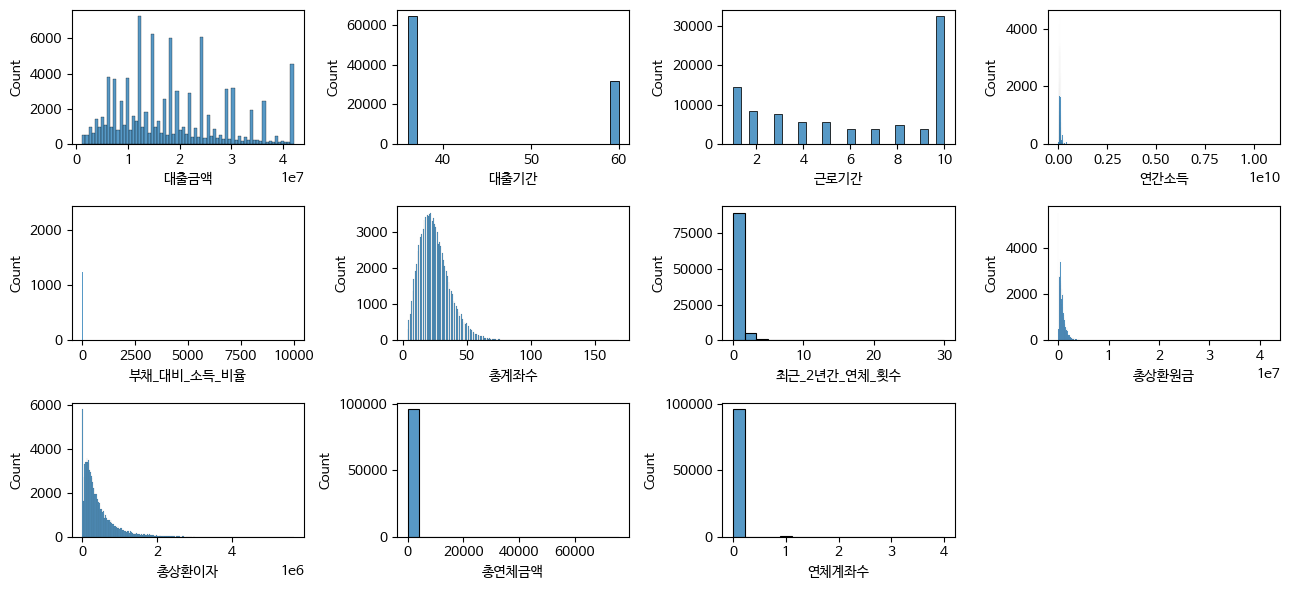

In [9]:
!pip install seaborn matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

i = 0
plt.figure(figsize=(13, 6))
for col in num_cols:
    i += 1
    plt.subplot(3, len(num_cols)//3 + 1, i)  # 그리드 크기를 열의 수에 맞게 조절
    sns.histplot(train[col])  # distplot 대신 histplot을 사용
plt.tight_layout()

<ipython-input-10-bafb31ebe114>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['대출등급'],ci=None)
<ipython-input-10-bafb31ebe114>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['대출등급'],ci=None)
<ipython-input-10-bafb31ebe114>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['대출등급'],ci=None)
<ipython-input-10-bafb31ebe114>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['대출등급'],ci=None)
<ipython-input-10-bafb31ebe114>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=train[col], y=train['대출등급'],ci=None)
<ipython-input-10-bafb31ebe114>:18: FutureWarning: 

The `ci` parameter is deprecated. Use

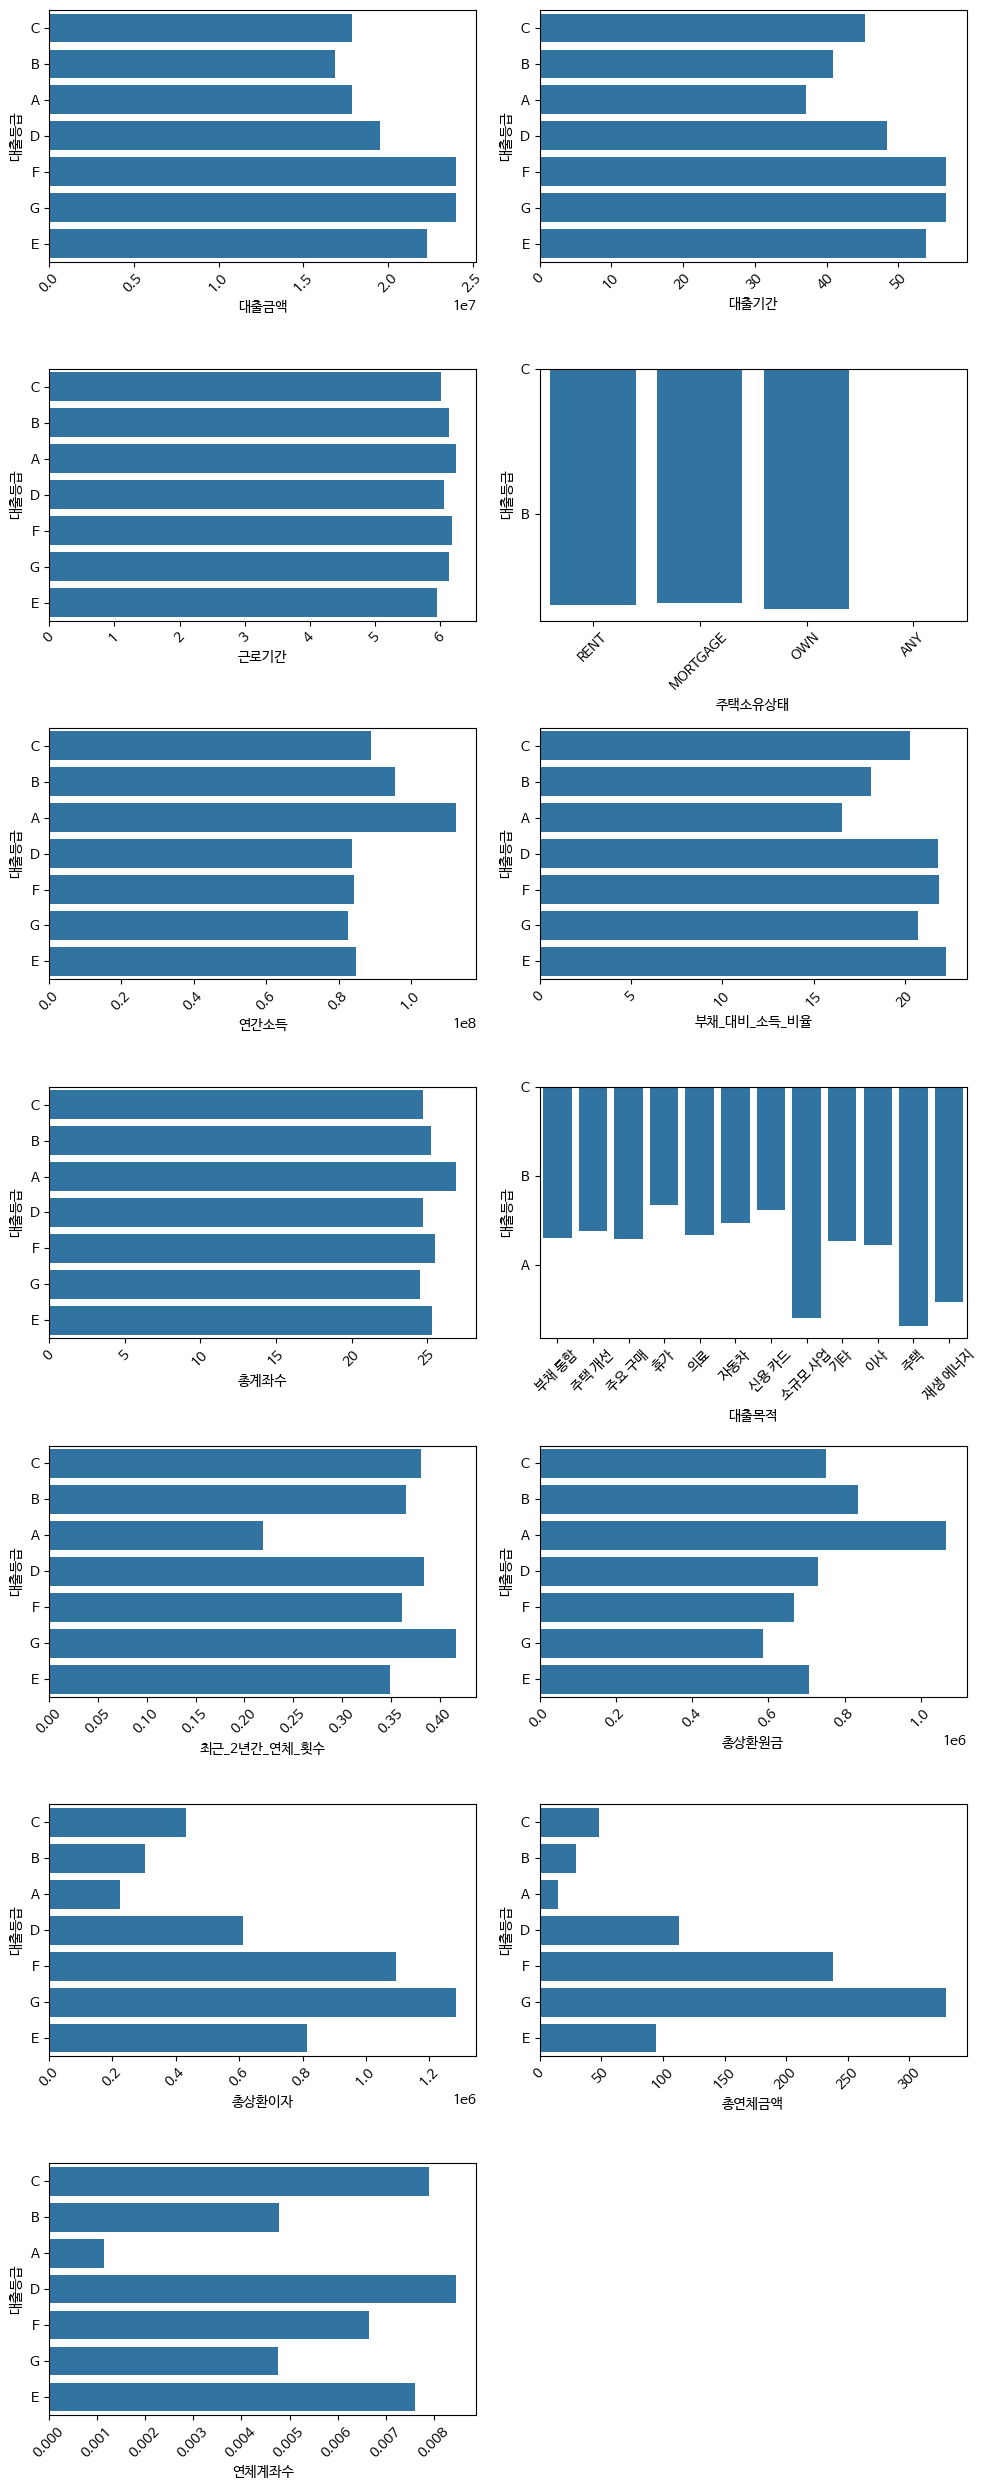

In [10]:
i = 0
plt.figure(figsize=(10,25))
for col in ['대출금액',
 '대출기간',
 '근로기간',
 '주택소유상태',
 '연간소득',
 '부채_대비_소득_비율',
 '총계좌수',
 '대출목적',
 '최근_2년간_연체_횟수',
 '총상환원금',
 '총상환이자',
 '총연체금액',
 '연체계좌수']:
    i += 1
    plt.subplot(7,2,i)
    sns.barplot(x=train[col], y=train['대출등급'],ci=None)
    plt.xticks(rotation=45)
plt.tight_layout()

대출등급           A         B         C         D         E         F         G
대출목적                                                                        
기타      0.075344  0.228571  0.360847  0.193862  0.101164  0.031111  0.009101
부채 통합   0.145712  0.284316  0.296446  0.154651  0.090281  0.023772  0.004823
소규모 사업  0.024142  0.095299  0.316391  0.243964  0.200762  0.081321  0.038119
신용 카드   0.262204  0.363959  0.246367  0.085388  0.035796  0.005592  0.000694
의료      0.100096  0.229066  0.360924  0.189605  0.087584  0.025987  0.006737
이사      0.025692  0.169960  0.401186  0.258893  0.098814  0.035573  0.009881
자동차     0.218319  0.323714  0.267252  0.109159  0.057716  0.018821  0.005019
재생 에너지  0.016667  0.066667  0.333333  0.350000  0.166667  0.066667       NaN
주요 구매   0.206323  0.265668  0.278979  0.132002  0.083195  0.029395  0.004437
주택      0.026578  0.119601  0.282392  0.225914  0.209302  0.096346  0.039867
주택 개선   0.198864  0.299513  0.274188  0.130682  0.068994  0.023539  0.004221

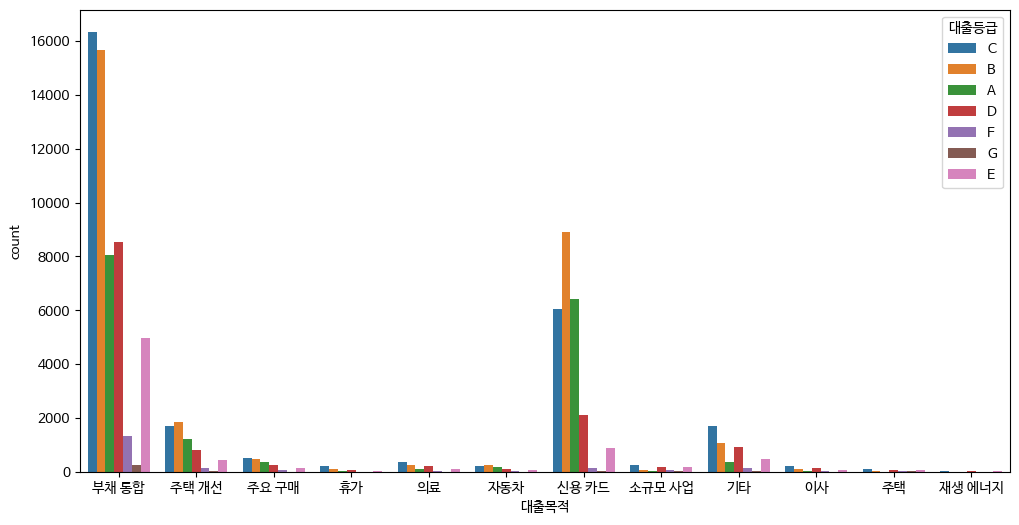

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

num_by_region = train.groupby(['대출목적', '대출등급']).size().unstack()
num_by_region = num_by_region.div(num_by_region.sum(axis=1), axis=0)  # 비율로 변환
print(num_by_region)

plt.figure(figsize=(12, 6))
sns.countplot(x='대출목적', hue='대출등급', data=train)
plt.show()

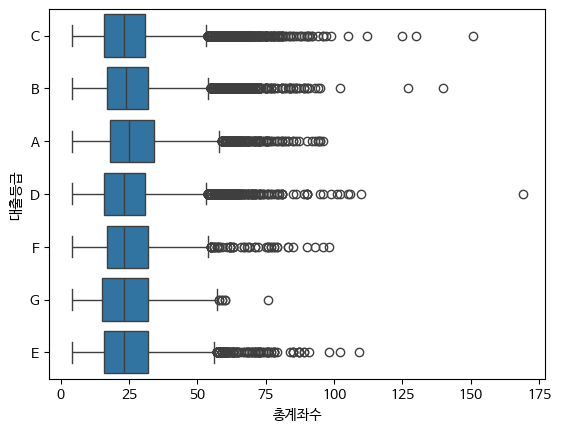

In [12]:
sns.boxplot(data=train, x='총계좌수', y='대출등급')
plt.show()

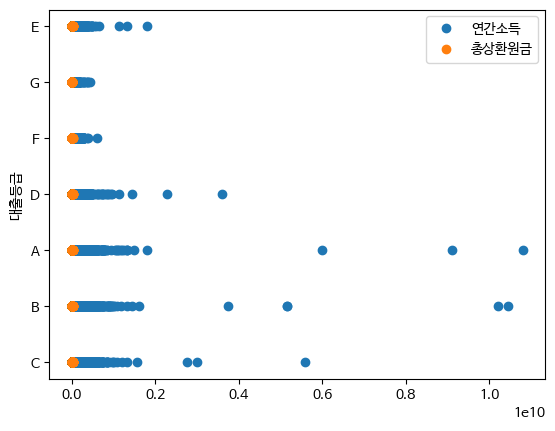

In [13]:
plt.scatter(x=train['연간소득'],y=train['대출등급'])
plt.ylabel("대출등급");

plt.scatter(x=train['총상환원금'],y=train['대출등급'])
plt.ylabel("대출등급");
plt.legend(['연간소득','총상환원금']);

<ipython-input-14-af006d592cb0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True);


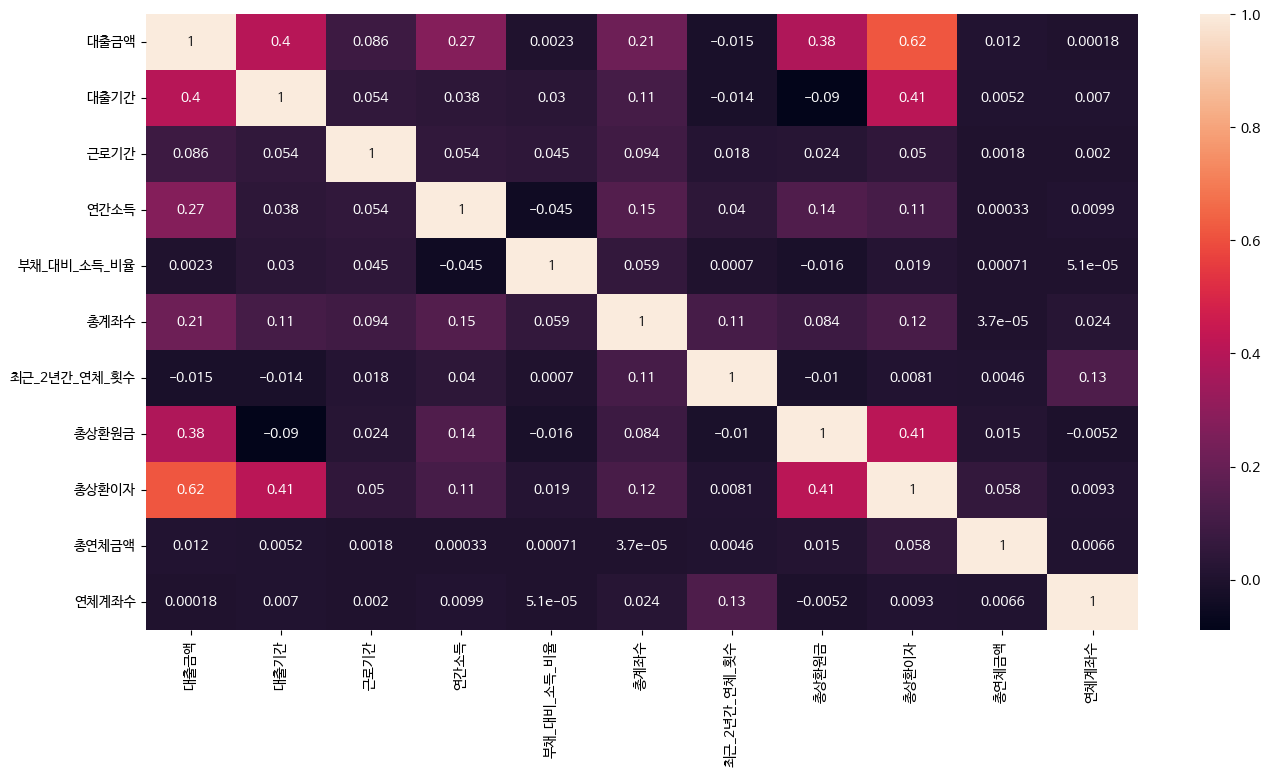

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(train.corr(), annot=True);

In [15]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [17]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [18]:
col_id = ['ID']

col_num = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']
col_cat = ['대출기간', '근로기간', '주택소유상태', '대출목적']

col_x = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출기간', '근로기간', '주택소유상태', '대출목적']
col_y = ['대출등급']

In [19]:
x_train = train[col_x]
y_train = train[col_y]

x_test = test[col_x]

In [20]:
x = pd.concat([x_train, x_test])

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(x[col_cat])

x_train_res = ohe.transform(x_train[col_cat])
x_test_res = ohe.transform(x_test[col_cat])

x_train_ohe = pd.DataFrame(x_train_res.todense(), columns=ohe.get_feature_names_out())
x_test_ohe = pd.DataFrame(x_test_res.todense(), columns=ohe.get_feature_names_out())

x_train_fin = pd.concat([x_train[col_num], x_train_ohe], axis=1)
x_test_fin = pd.concat([x_test[col_num], x_test_ohe], axis=1)

In [21]:
num_scalers = 9

scalers = [MinMaxScaler() for _ in range(num_scalers)]

for i, col in enumerate(col_num):
    x_train_fin[col] = scalers[i].fit_transform(x_train_fin[[col]])
    x_test_fin[col] = scalers[i].transform(x_test_fin[[col]])

In [22]:
label_encoder = LabelEncoder()

y_train['대출등급'] = label_encoder.fit_transform(y_train['대출등급'])

<ipython-input-22-14f77cbc9a26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['대출등급'] = label_encoder.fit_transform(y_train['대출등급'])


In [23]:
x_train_tensor = torch.tensor(x_train_fin.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_fin.values, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values)
y_train_tensor = y_train_tensor.squeeze()

In [24]:
dataset = TensorDataset(x_train_tensor, y_train_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [25]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(44, 128)
    self.fc2 = nn.Linear(128, 256)
    self.fc3 = nn.Linear(256, 112)
    self.fc4 = nn.Linear(112, 56)
    self.fc5 = nn.Linear(56, 7)
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(0.25)

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc4(x)
    x = self.relu(x)
    x = self.dropout(x)
    x = self.fc5(x)
    return x

In [26]:
model = MLP()

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [27]:
def calculate_accuracy(outputs, targets):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 100
for epoch in range(1, num_epochs+1):
  total_loss = 0.0
  total_accuracy = 0.0

  for batch_x, batch_y in dataloader:
    batch_x, batch_y = batch_x.to(device), batch_y.to(device)

    outputs = model(batch_x)

    loss = criterion(outputs, batch_y)
    total_loss += loss.item()

    accuracy = calculate_accuracy(outputs, batch_y)
    total_accuracy += accuracy

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  avg_loss = total_loss / len(dataloader)
  avg_accuracy = total_accuracy / len(dataloader)

  if epoch % 10 == 0:
    print('Epoch [{}/{}], Loss: {}, Accuracy: {}'.format(
      epoch, num_epochs, avg_loss, avg_accuracy
  ))

Epoch [10/100], Loss: 1.0889201635736168, Accuracy: 0.540282392026578
Epoch [20/100], Loss: 0.7150711000856768, Accuracy: 0.7108319490586932
Epoch [30/100], Loss: 0.6313545632104937, Accuracy: 0.747124169435216
Epoch [40/100], Loss: 0.6025769504597813, Accuracy: 0.7598733388704318
Epoch [50/100], Loss: 0.588453434407711, Accuracy: 0.7676598837209302
Epoch [60/100], Loss: 0.5757867092012963, Accuracy: 0.7726432724252492
Epoch [70/100], Loss: 0.5661127445111639, Accuracy: 0.7772598283499447
Epoch [80/100], Loss: 0.5591084871131716, Accuracy: 0.7810527408637874
Epoch [90/100], Loss: 0.5517831735733736, Accuracy: 0.7843680786267995
Epoch [100/100], Loss: 0.5490492305733833, Accuracy: 0.7864929401993356


In [29]:
model.eval()

with torch.no_grad():
  x_test_tensor = x_test_tensor.to(device)

  predictions = model(x_test_tensor)

_, predicted_labels = torch.max(predictions, 1)

predicted_labels = predicted_labels.cpu().numpy()
predicted_labels = label_encoder.inverse_transform(predicted_labels)

In [31]:
test_id = test[col_id].values.flatten()

result_df = pd.DataFrame({'ID': test_id, '대출등급': predicted_labels})
result_df.to_csv('pred.csv', index=False)